In [56]:
# WhatsApp Chat Sentiment Analysis
# Install dependencies
!pip install emoji
!pip install emoji wordcloud nltk matplotlib seaborn pandas

import re
import nltk
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [57]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
# Load the chat file
chat_file_path = '/content/chat.txt.txt'  # Replace with your exported WhatsApp file path
with open(chat_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [59]:
# Preprocess chat lines
pattern = re.compile(r'\[(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}:\d{2} [APMapm]{2})\] (.*?): (.*)')
data = []

In [60]:
for line in lines:
    match = pattern.match(line)
    if match:
        date, time, person, message = match.groups()
        data.append({"datetime": f"{date} {time}", "person": person, "message": message})

In [61]:
import datetime
pattern = re.compile(r'(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2})\u202f?(am|pm) - (.*?): (.*)', re.IGNORECASE)
data = []
for line in lines:
    match = pattern.match(line)
    if match:
        date, time, am_pm, person, message = match.groups()
        full_datetime = f"{date} {time} {am_pm.upper()}"
        data.append({
            "datetime": full_datetime,
            "person": person.strip(),
            "message": message.strip()
        })
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%y %I:%M %p')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time


In [62]:
# Emoji Analysis
import emoji
def extract_emojis(s):
    return [c for c in s if emoji.is_emoji(c)]

emoji_counts = defaultdict(Counter)
for _, row in df.iterrows():
    emojis = extract_emojis(row['message'])
    emoji_counts[row['person']].update(emojis)

In [63]:
# Display most used emojis
for person, counter in emoji_counts.items():
    print(f"\n{person}'s most used emojis:")
    print(counter.most_common(5))


RUGVED GAIKWAD's most used emojis:
[('🏻', 14), ('👍', 8), ('💪', 4), ('🫠', 3), ('💯', 2)]

Dhiraj Mavale Gym's most used emojis:
[('👍', 1), ('🤣', 1), ('😅', 1), ('💕', 1), ('😘', 1)]


In [64]:
# Emoji usage per person (count)
emoji_counts = defaultdict(Counter)

for _, row in df.iterrows():
    emojis = extract_emojis(row['message'])
    emoji_counts[row['person']].update(emojis)

In [65]:
# Print top 5 emojis used by each person
for person, counter in emoji_counts.items():
    print(f"\nTop emojis used by {person}:")
    for emoji_char, count in counter.most_common(5):
        print(f"{emoji_char}: {count}")


Top emojis used by RUGVED GAIKWAD:
🏻: 14
👍: 8
💪: 4
🫠: 3
💯: 2

Top emojis used by Dhiraj Mavale Gym:
👍: 1
🤣: 1
😅: 1
💕: 1
😘: 1


<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 129760 (\N{MELTING FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-76-67f87edcc673>:17: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  plt.tight_

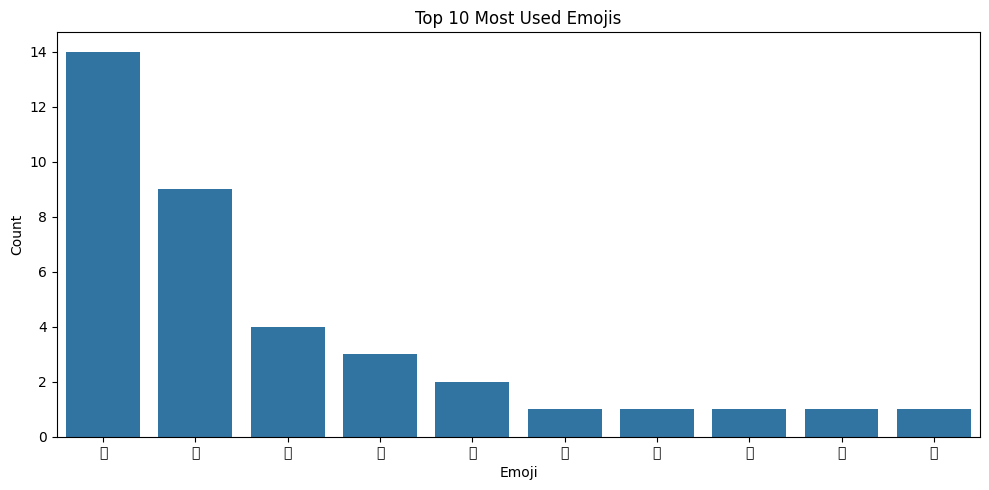

In [76]:
# Combine all emojis
total_emojis = Counter()

for counter in emoji_counts.values():
    total_emojis.update(counter)

# Top 10 emojis
top_emojis = total_emojis.most_common(10)

if top_emojis:
    emojis, counts = zip(*top_emojis)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(emojis), y=list(counts))
    plt.title('Top 10 Most Used Emojis')
    plt.ylabel('Count')
    plt.xlabel('Emoji')
    plt.tight_layout()
    plt.show()

else:
    print("No emojis found in the chat data.")

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Calculate compound sentiment score for each message
df['sentiment'] = df['message'].apply(lambda msg: sia.polarity_scores(msg)['compound'])

# Group by date and person
daily_sentiment = df.groupby(['date', 'person'])['sentiment'].mean().reset_index()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


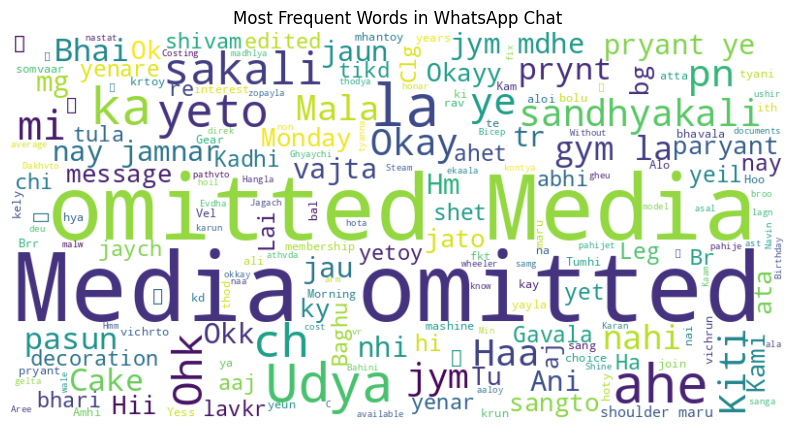

In [68]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['message'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in WhatsApp Chat")
plt.show()


In [69]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['message'].apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [70]:
# Daily average sentiment
daily_sentiment = df.groupby(['date', 'person'])['sentiment'].mean().reset_index()

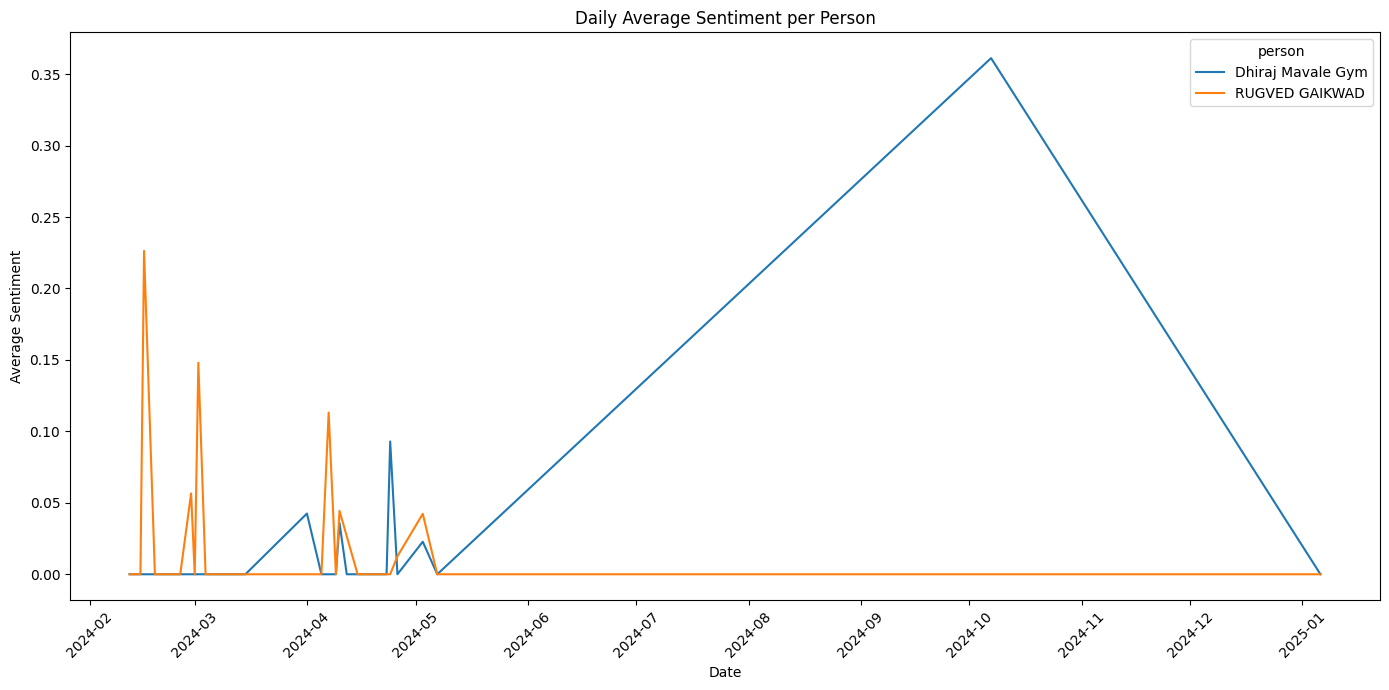

In [71]:
# Plotting sentiment over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sentiment', hue='person', data=daily_sentiment)
plt.title('Daily Average Sentiment per Person')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

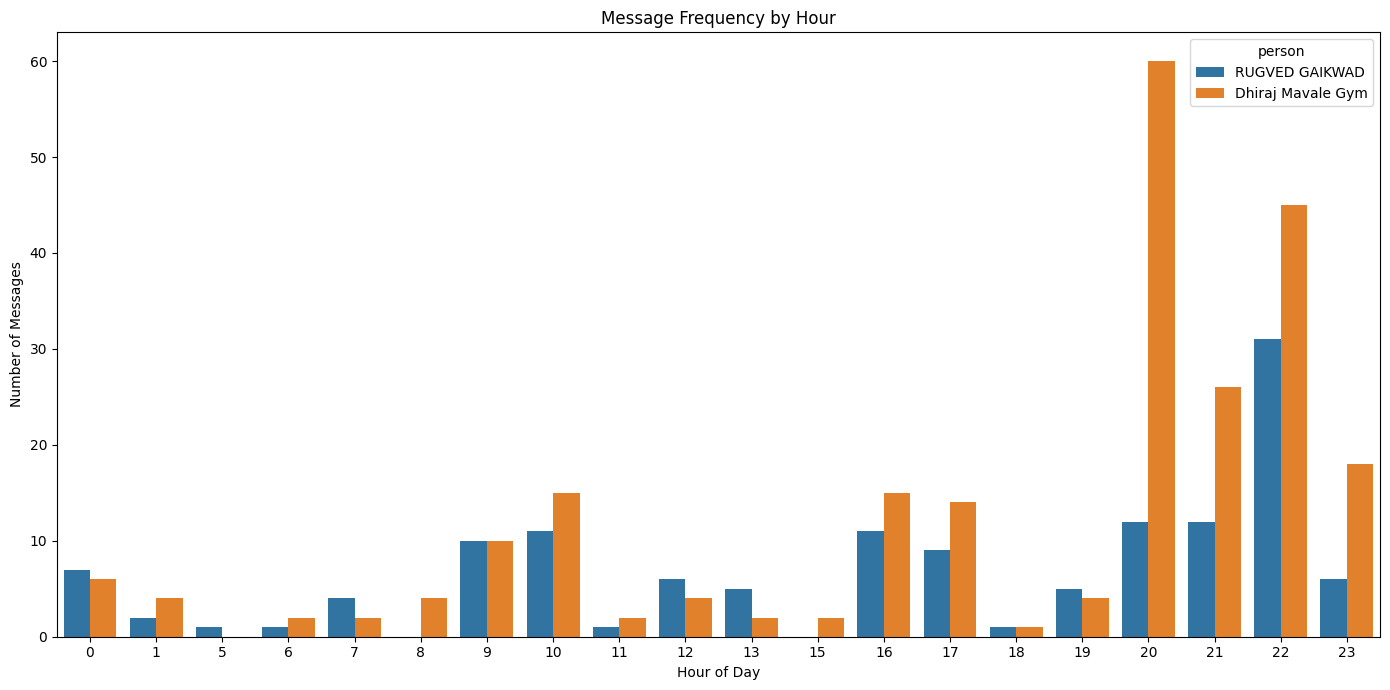

In [72]:
# Message Frequency by Hour
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(14, 7))
sns.countplot(x='hour', hue='person', data=df)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

In [73]:
# Determine sentiment category based on overall sentiment score
if overall_sentiment > 0.1:
    sentiment_category = 'Positive'
elif overall_sentiment < -0.1:
    sentiment_category = 'Negative'
else:
    sentiment_category = 'Neutral'

# Show Overall Sentiment
print(f"Overall Sentiment Score: {overall_sentiment:.2f}")
print(f"Overall Sentiment Category: {sentiment_category}")

Overall Sentiment Score: 0.12
Overall Sentiment Category: Positive


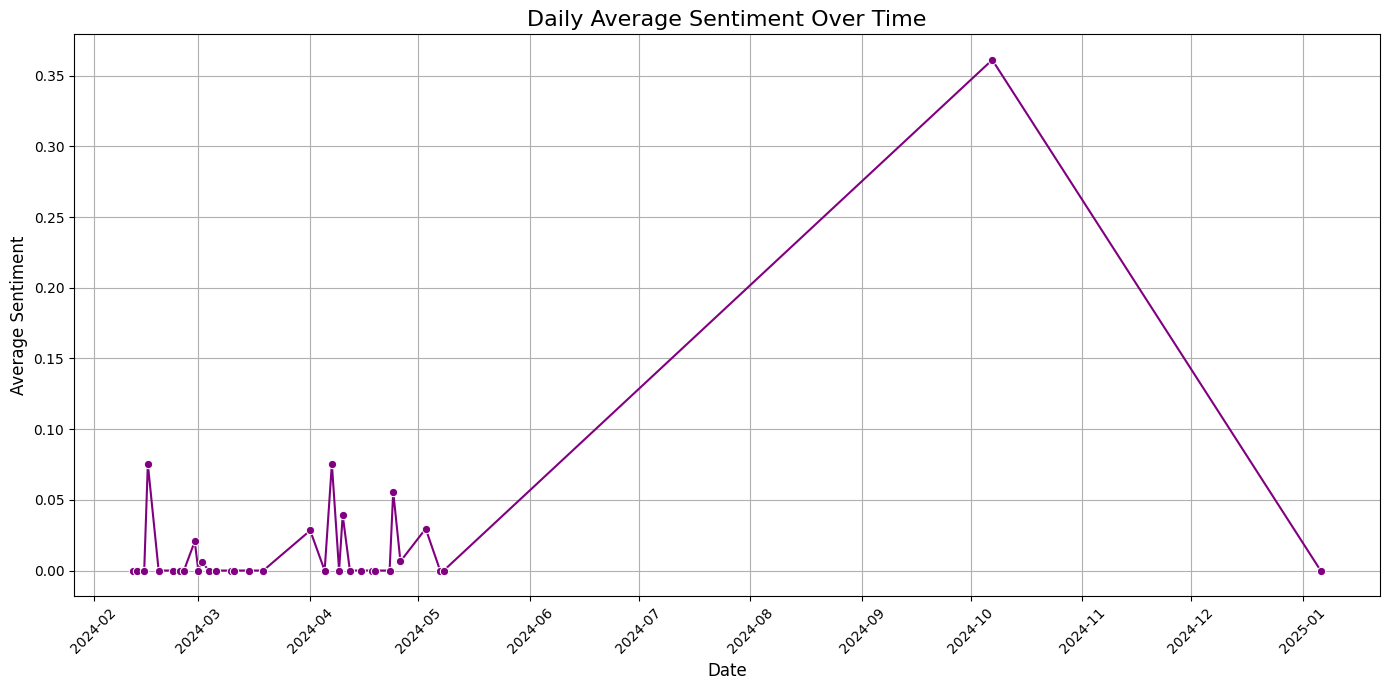

In [74]:
# Visualizing Sentiment Over Time
daily_sentiment = df.groupby('date')['sentiment'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sentiment', data=daily_sentiment, marker='o', color='purple')
plt.title('Daily Average Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the sentiment plot
plt.show()

In [75]:
# Sentiment Distribution (Positive, Neutral, Negative)
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_values = [
    len(df[df['sentiment'] > 0.1]),  # Positive
    len(df[(df['sentiment'] <= 0.1) & (df['sentiment'] >= -0.1)]),  # Neutral
    len(df[df['sentiment'] < -0.1])  # Negative
]